In [2]:
#import basic libraries
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

## TASK-1
Generate data samples that are randomly distributed on 3 concentric spheres 
in 3D space with center at (1,1,1) and radius with 1, 2 and 3 respectively. Plot a 
3D scatterplot of them using 3 different colors for the points on 3 different 
spheres.

In [3]:
#function for generating samples spread over a sphericalsurface
#attributes radius of sphere, number of samples as n_samples
#and centre of sphere, by default its (0,0,0)

def make_spherical_sample(radius, n_samples,centre=(0,0,0)):
    
    #define cordinates of centre
    x_0 = centre[0]
    y_0 = centre[1]
    z_0 = centre[2]
    r = radius                      
    n = math.floor(math.sqrt(n_samples))       #squre root of n_samples as with this we will choose n theta, and n phi
                                               #meshgrid of thes to gives n_samples
    
    phi = np.linspace(0, 2*np.pi, n)           #list of n phi values between 0 and 2Pi
    theta = np.linspace(0, np.pi, n)           #list of n theta values between 0 and pi
    
    theta, phi = np.meshgrid(theta, phi)       #create meshgrid between phi list and theta list 
    
    x = x_0 + np.cos(phi) * r*np.sin(theta)    # x cordinate
    y = y_0 + np.sin(phi) * r*np.sin(theta)    # y cordinate
    z = z_0 + r * np.cos(theta)                # z cordinate
    
    return x,y,z                               #return x,y,z cordinates
    

In [4]:
#generate 100 samples sread on the surface of a sphere having radius=1, centered at (1,1,1)
x_1,y_1,z_1= make_spherical_sample(1, 100, centre=(1,1,1))   
#generate 100 samples sread on the surface of a sphere having radius=2, centered at (1,1,1)        
x_2,y_2,z_2= make_spherical_sample(2, 100, centre=(1,1,1))
#generate 100 samples sread on the surface of a sphere having radius=3, centered at (1,1,1)   
x_3,y_3,z_3= make_spherical_sample(3, 100, centre=(1,1,1))

#resgape x, y and z cordinates in to a single vector
x_1 = x_1.reshape(100,1)             
y_1 = y_1.reshape(100,1) 
z_1 = z_1.reshape(100,1)

x_2 = x_2.reshape(100,1) 
y_2 = y_2.reshape(100,1) 
z_2 = z_2.reshape(100,1)

x_3 = x_3.reshape(100,1) 
y_3 = y_3.reshape(100,1) 
z_3 = z_3.reshape(100,1)

Text(0.5, 0, 'Z ----->')

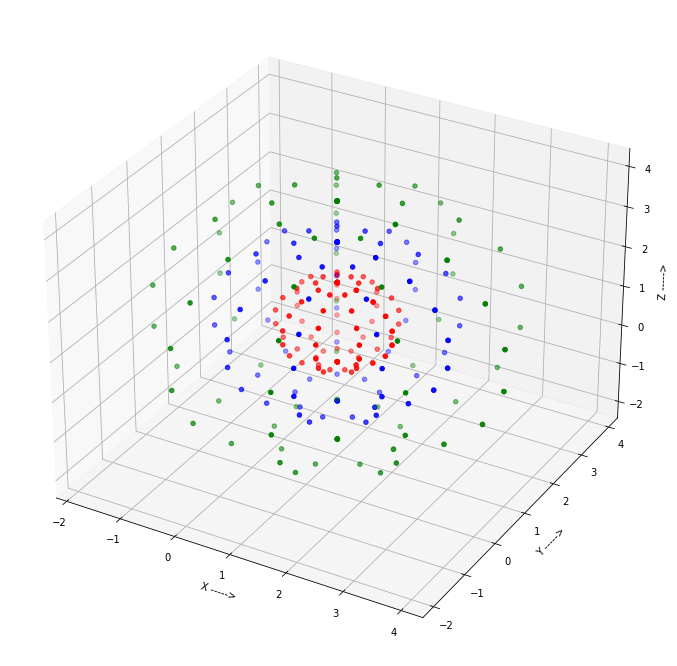

In [7]:
#plot three type of samples seperately
fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection='3d')
ax.scatter(x_1, y_1, z_1, color ='red')
ax.scatter(x_2, y_2, z_2, color = 'blue')
ax.scatter(x_3, y_3, z_3, color = 'green')

ax.set_xlabel('X ----->')
ax.set_ylabel('Y ----->')
ax.set_zlabel('Z ----->')

### TASK-2
Find the 2D presentation of these samples using Linear PCA, PCA with a 
polynomial kernel with degree 5, and PCA with Gaussian kernel. Please select 
the width of the Gaussian kernel appropriately so that samples from 3 classes 
become well separated from each other in their 2D projection. 

In [16]:
#concatenate all vectors in to a single matrix with all three types of samples
class_1 = np.concatenate([x_1, y_1, z_1], axis=1)
class_2 = np.concatenate([x_2, y_2, z_2], axis=1)
class_3 = np.concatenate([x_3, y_3, z_3], axis=1)

X = np.concatenate([class_1, class_2, class_3], axis=0)

In [17]:
#create labels for each sphere seperately and concatenate them to a single column
radius_1 = np.array(['r1' for i in range(len(class_1))])
radius_2 = np.array(['r2' for i in range(len(class_2))])
radius_3 = np.array(['r3' for i in range(len(class_3))])
y = np.concatenate([radius_1,radius_2,radius_3], axis=0)

###### Linear PCA

In [71]:
#import library for PCA and kernelPCA
from sklearn.decomposition import PCA, KernelPCA

pca = PCA(n_components=2)       #define linear pca object with 2 components
X_pca = pca.fit_transform(X)    #fit and transform with data X

X.shape, X_pca.shape           #shape before and after the PCA 

((300, 3), (300, 2))

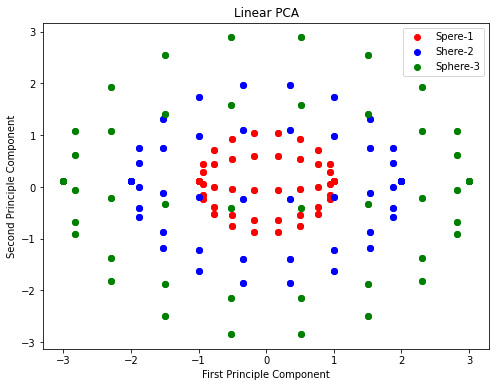

In [19]:
#plotting resulting features
plt.figure(figsize=[8, 6])
plt.scatter(X_pca[:100,0], X_pca[:100,1], color='r' )
plt.scatter(X_pca[100:200,0], X_pca[100:200,1], color='b' )
plt.scatter(X_pca[200:300,0], X_pca[200:300,1], color='g' )
plt.legend(['Spere-1','Shere-2', 'Sphere-3'])
plt.title('Linear PCA')
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')
plt.show()
plt.close()

###### Kernel PCA with polynomial kernel

In [72]:
pca_poly = KernelPCA(n_components=2, kernel='poly', degree=5)   #define object for kernelPCA with polynomil kernel, degree=5, number of components=2
X_pca = pca_poly.fit_transform(X)                       #fit and transform with data X

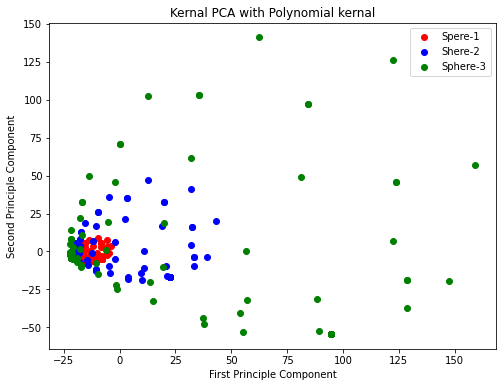

In [73]:
#Plot the resulting features
plt.figure(figsize=[8, 6])
plt.scatter(X_pca[:100,0], X_pca[:100,1], color='r' )
plt.scatter(X_pca[100:200,0], X_pca[100:200,1], color='b' )
plt.scatter(X_pca[200:300,0], X_pca[200:300,1], color='g' )
plt.legend(['Spere-1','Shere-2', 'Sphere-3'])
plt.title('Kernal PCA with Polynomial kernal')
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')
plt.show()
plt.close()

###### Kernel PCA with guassian kernel

In [84]:
pca_rbf = KernelPCA(n_components=2, kernel='rbf', gamma=0.5) #define an object for kernel pca, kernel='rbf'
X_pca = pca_rbf.fit_transform(X)                            #fit and transform the data X

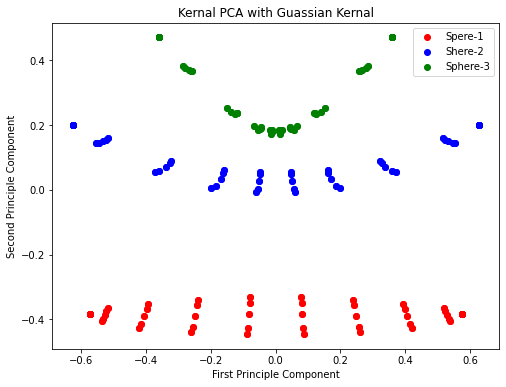

In [85]:
#plot the resulting features
plt.figure(figsize=[8, 6])
plt.scatter(X_pca[:100,0], X_pca[:100,1], color='r' )
plt.scatter(X_pca[100:200,0], X_pca[100:200,1], color='b' )
plt.scatter(X_pca[200:300,0], X_pca[200:300,1], color='g' )
plt.legend(['Spere-1','Shere-2', 'Sphere-3'])
plt.title('Kernal PCA with Guassian Kernal')
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')
plt.show()
plt.close()

In [86]:
# With gamma=0.5 the all three set of data points get well seperated

### TASK -3
The data file has 600 observations with 8 attributes. The psychological attributes 
as: locus_of_control, self_concept, motivation; academic attributes as: read, 
write, math, science; and one gender attribute. Split the data file into two sets of 
variables i.e. ‘U’ and ‘V’, with ‘U’ = {set of psychological attributes} and ‘V’ = 
{academic attributes + gender}. Perform canonical correlation analysis with:
 i. n_components = 2
 ii. n_components = 3
where, n_components = number of components to keep, and report the results.

In [3]:
df =  pd.read_csv('ML_Assignment-7_dataFile.csv')           #read the data 

In [4]:
df.head()

,locus_of_control,self_concept,motivation,read,write,math,science,female
0,-0.84,-0.24,1.00,54.8,64.5,44.5,52.6,1
1,-0.38,-0.47,0.67,62.7,43.7,44.7,52.6,1
2,0.89,0.59,0.67,60.6,56.7,70.5,58.0,0
3,0.71,0.28,0.67,62.7,56.7,54.7,58.0,0
4,-0.64,0.03,1.00,41.6,46.3,38.4,36.3,1


In [5]:
df_U = df[['locus_of_control','self_concept','motivation']]         #set of psychological attributes
df_V = df[['read','write','math','science','female']]               #academic attributes + gende

df_U.shape, df_V.shape

((600, 3), (600, 5))

###### CCA with n_components = 2

In [6]:
from sklearn.cross_decomposition import CCA                 #import library for CCA

cca = CCA(n_components=2)                                   #define an object for CCA with 2 components

#fit and transform both U and V
cca.fit(df_U, df_V)
u1, v1 = cca.transform(df_U, df_V)

In [7]:
u1.shape, v1.shape                                         #resulting shapes of u and v

((600, 2), (600, 2))

In [9]:
#resulting components of U
u1 = pd.DataFrame(u1, columns=['Component-1', 'Component-2'])           
u1

,Component-1,Component-2
0,-0.675499,-1.351764
1,-0.428873,-0.761413
2,0.819610,1.013201
3,0.700093,0.597240
4,-0.515940,-0.966208
...,...,...
595,1.629995,-0.455432
596,0.600360,-0.497929
597,0.895474,-0.374132
598,0.959629,-0.347219


In [11]:
#resulting components of V
v1=pd.DataFrame(v1, columns=['Component-1', 'Component-2'])
v1

,Component-1,Component-2
0,0.991768,-0.884255
1,0.427415,0.026023
2,0.966890,0.902299
3,0.566103,0.979215
4,-1.135884,-1.543957
...,...,...
595,1.758181,-0.771381
596,2.021278,-0.134755
597,1.634464,0.329484
598,1.114971,-1.465964


Text(0.5, 1.0, 'V attributes after CCA')

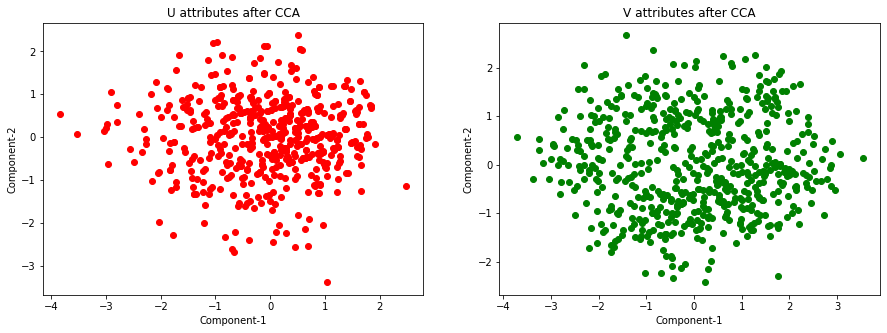

In [14]:
# plot resulting fatures of U and V seperately

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.scatter(u1['Component-1'], u1['Component-2'], color='red' )
ax1.set_xlabel('Component-1')
ax1.set_ylabel('Component-2')
ax1.set_title('U attributes after CCA')
ax2.scatter(v1['Component-1'], v1['Component-2'], color='green' )
ax2.set_xlabel('Component-1')
ax2.set_ylabel('Component-2')
ax2.set_title('V attributes after CCA')


###### CCA with n_components = 3

In [15]:
cca = CCA(n_components=3)                  #define an object for CCA with 3 components

#fit and transform both U and V
cca.fit(df_U, df_V)
u2, v2 = cca.transform(df_U, df_V)

In [16]:
u2.shape, v2.shape                            #resulting shapes of u and v

((600, 3), (600, 3))

In [17]:
#resulting component of u
u2 = pd.DataFrame(u2, columns=['Component-1', 'Component-2','Component-3'])  
u2

,Component-1,Component-2,Component-3
0,-0.675499,-1.351764,1.140783
1,-0.428873,-0.761413,-0.061105
2,0.819610,1.013201,-0.024290
3,0.700093,0.597240,-0.166915
4,-0.515940,-0.966208,1.235229
...,...,...,...
595,1.629995,-0.455432,-0.136996
596,0.600360,-0.497929,0.635918
597,0.895474,-0.374132,0.477480
598,0.959629,-0.347219,0.443037


In [18]:
#resulting components of V
v2 = pd.DataFrame(v2, columns=['Component-1', 'Component-2','Component-3'])
v2

,Component-1,Component-2,Component-3
0,0.991768,-0.884255,0.126631
1,0.427415,0.026023,-1.020573
2,0.966890,0.902299,0.695644
3,0.566103,0.979215,0.626883
4,-1.135884,-1.543957,-0.013346
...,...,...,...
595,1.758181,-0.771381,0.211837
596,2.021278,-0.134755,-0.458984
597,1.634464,0.329484,-0.995914
598,1.114971,-1.465964,0.427627


Text(0.5, 0, 'Component-3')

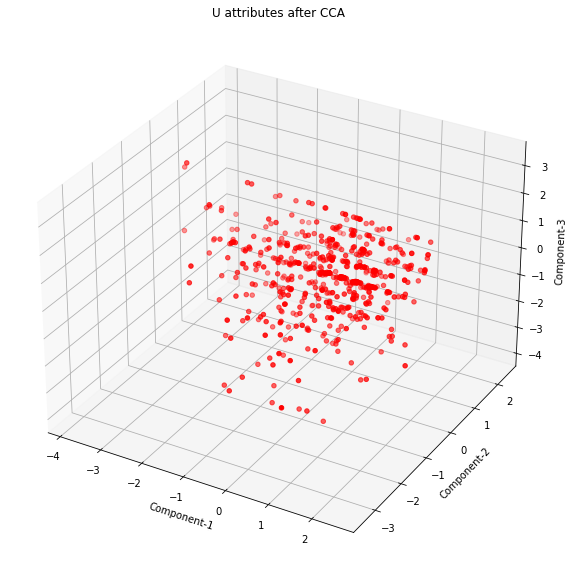

In [19]:
#ploting resultant features of U
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter(u2['Component-1'], u2['Component-2'], u2['Component-3'], color ='red')
ax.set_title('U attributes after CCA')
ax.set_xlabel('Component-1')
ax.set_ylabel('Component-2')
ax.set_zlabel('Component-3')

Text(0.5, 0, 'Component-3')

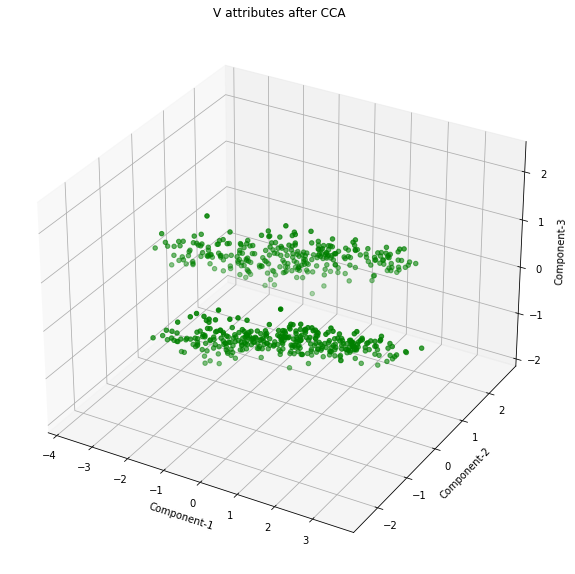

In [20]:
#ploting resulting features of V
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter(v2['Component-1'], v2['Component-2'], v2['Component-3'], color ='green')
ax.set_title('V attributes after CCA')
ax.set_xlabel('Component-1')
ax.set_ylabel('Component-2')
ax.set_zlabel('Component-3')